# Customer Creditability Classification 
##### - using Logistic Regression, Random Forest, XGBoost and LightGBM

_Author_: QH  
_First Version Date: 2022-01-18_  
_Latest update on: 2022-12-14_

The objective of this project is to classify customer's creditability based on German Credit data using very commonly used classification methods in Machine Learning. Sections are arranged as follows:
1. Data Dictionary of German Credit data to understand the metadata
2. Python libraries versions
3. Exploratory Analysis
    * Understand the distributions of features, relationships between target variable and features, association between features.
    * Transform numeric variables and Re-grouping categorical variables
4. Classification
    * Logistic Regression
    * Random Forest
    * XGBoost
    * LightGBM
5. Evaluation and Comparison of the classification methods

## 1. Data Dictionary of German Credit Data
The following is the data dictionary for this dataset. Some of the variables have been label encoded (i.e. ordinal encoded):

| Variable Name | Description | Values|Type|
| :--|:-- | :-- |:--|
|`Creditability`|Credit-worthiness of a client|1: credit-worthy <br> 0: not credit-worth|Target Variable|
|`Account Balance`|Balance of current account|1: no running account <br> 2: no balance or debit <br> 3: 0 <= ... < 200 DM <br> 4: ... >= 200 DM for checking account for at least 1 year|Ordinal|
|`Duration of Credit (month)`|Duration in months (metric)|-|Numeric|
|`Payment Status of Previous Credit`|Payment of previous credits|0：hesitant payment of previous credits <br> 1: problematic running account / there are further credits running but at other banks <br> 2: no previous credits / paid back all previous credits <br> 3: no problems with current credits at this bank <br> 4: paid back previous credits at this bank|Nominal|
|`Purpose`|Purpose of Credit|0:other <br> 1:new car <br> 2:used car <br> 3:items of furniture <br> 4:radio / television <br> 5:household appliances <br> 6:repair <br> 7:education <br> 8:vacation <br> 9:retraining <br> 10:business|Nominal|
|`Credit Amount`|Amount of credit|-|Numeric|
|`Value Savings/Stocks`|Value of savings or stocks|1:not available / no savings <br> 2: < 100 DM <br> 3: 100 <= ... < 500 - DM <br> 4:500 <= ... < 1000 DM <br> 5: >= 1000 DM|Ordinal|
|`Length of current employment`|Has been employed by current employer for|1: unemployed <br> 2: <= 1 year <br> 3: 1 <= ... < 4 years <br> 4: 4 <= ... < 7 years <br> 5: >= 7 years|Ordinal|
|`Instalment per cent`|Instalment in % of available income|1:>= 35 <br> 2: 25 <= ... < 35 <br> 3:20 <= ... < 25 <br> 4: < 20 |Ordinal|
|`Sex & Marital Status`|Marital Status/Sex|1: male: divorced / living apart <br> 2: male: single <br> 3: male: married / widowed <br> 4: female|Nominal|
|`Guarantors`|Further debtors / Guarantors|1: none <br> 2: Co-Applicant <br> 3: Guarantor|Ordinal|
|`Duration in Current address`|Living in current household for|1: < 1 year <br> 2: 1 <= ... < 4 years <br> 3: 4 <= ... < 7 years <br> 4: >= 7 years|Ordinal|
|`Most valuable available asset`|Most valuable available assets|1: not available / no assets <br> 2: Car / Other <br> 3: Savings contract with a building society / Life insurance <br> 4: Ownership of house or land|Nominal/Ordinal|
|`Age (years)`|Age in years|-|Numeric|
|`Concurrent Credits`|Further running credits|1: at other banks <br> 2: at department store or mail order house <br> 3: no further running credits|Nominal/Ordinal|
|`Type of apartment`|Type of apartment|1: rented flat <br> 2: owner-occupied flat <br> 3: free apartment|Nominal/Ordinal|
|`No. of Credits at this Bank`|Number of previous credits at this bank including the running one|1: one <br> 2: two or three <br> 3: four or five <br> 4: six or more|Ordinal|
|`Occupation`|Occupation|1: unemployed / unskilled with no permanent residence <br> 2: unskilled with permanent residence <br> 3: skilled worker / skilled employee / minor civil servant <br> 4: executive / self-employed / higher civil servant|Nominal/Ordinal|
|`No of dependents`|Number of persons entitled to maintenance|1: 0 - 2 <br> 2: 3 and more |Ordinal|
|`Telephone`|Whether he/she has a telephone?|1: no <br> 2: yes|Nominal|
|`Foreign Worker`|Whether he/she is a foreign worker?|1: yes <br> 2:no|Nominal|

## 2. Python and Library Versions

Import the packages needed for the analysis and print out the versions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
import scipy
import xgboost as xgb
import category_encoders as ce
import graphviz

from matplotlib import pyplot as plt
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# import utility functions
import sys
import os
# setting path
sys.path.append('..')
from py_util import util, preprocessing_util as prep, perfcheck_util as perfc

In [2]:
print('Python version: ' + sys.version)
package_dict = {'Pandas': pd, 'Numpy': np, 'Matplotlib': matplotlib, 'Seaborn': sns, 
'Scikit-Learn': sklearn, 'SciPy': scipy, 'xgboost': xgb, 'category_encoders': ce, 'graphviz': graphviz}
util.print_version(package_dict)

Python version: 3.9.4 (v3.9.4:1f2e3088f3, Apr  4 2021, 12:32:44) 
[Clang 6.0 (clang-600.0.57)]
Pandas: 1.4.3
Numpy: 1.23.2
Matplotlib: 3.5.3
Seaborn: 0.11.2
Scikit-Learn: 1.1.2
SciPy: 1.9.0
xgboost: 1.6.1
category_encoders: 2.5.1.post0
graphviz: 0.20.1


## 3. Exploratory Analysis

First, we read in the dataset.

In [3]:
# read-in dataset
german_credit_ds = pd.read_csv("german_credit.csv")

Get the data information. As can be seen from the following there are in total 1000 observations and 21 columns with no missing data.

In [4]:
german_credit_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
# Take a look at the data
german_credit_ds.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### 3.1 Univariate Analysis
This section we will perform univariate analysis which includes:
* Understand the distributions of each variables (numeric, categorical)
    * Perform transformation or re-grouping on variables if necessary
* Rank order the information that each variable provided to predict the creditability.
    * Perform initial feature selection

We first split the numeric variables, categorical variables and target variables.

In [6]:
# Columns of the data: Creditability is the target variable (if there's more than 10 unique values in a feature, we treat as numeric variables)
variables = prep.split_num_cat_target(german_credit_ds, 'Creditability', lvl_theta=10, show=True)

╒═════════════╤════════════════════════════════════════════════════════════════════════╕
│ Type        │ Variables Names                                                        │
╞═════════════╪════════════════════════════════════════════════════════════════════════╡
│ Target      │ Creditability                                                          │
├─────────────┼────────────────────────────────────────────────────────────────────────┤
│ ID          │                                                                        │
├─────────────┼────────────────────────────────────────────────────────────────────────┤
│ Numeric     │ Duration of Credit (month), Credit Amount, Age (years)                 │
├─────────────┼────────────────────────────────────────────────────────────────────────┤
│ Categorical │ Account Balance, Payment Status of Previous Credit, Purpose, Value     │
│             │ Savings/Stocks, Length of current employment, Instalment per cent, Sex │
│             │ & Mar

#### 3.1.1 Distributions of Numeric Variables

We first plot the histogram for the numeric variables to show the distributions of these variables.

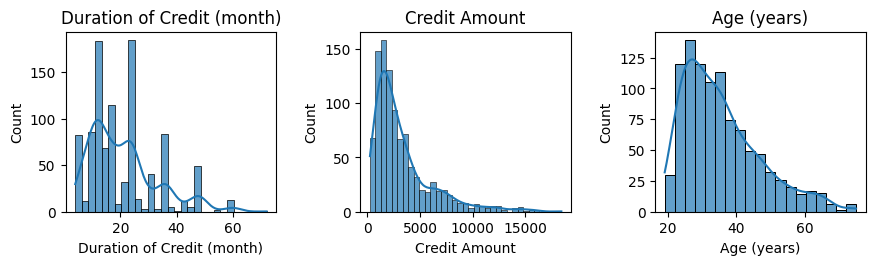

In [7]:
# Descriptive stats for the features
prep.plot_all_dist(german_credit_ds, (10, 2), variables['numeric'], 1, 3)

From the histograms of the numeric variables, it is noticable that all of them are slightly skewed. We can try to do a log transformation on the variables.

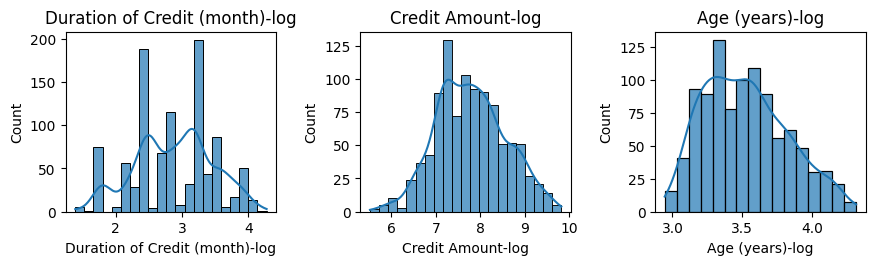

In [8]:
log_trans_df = german_credit_ds[variables['numeric']].astype(float).apply(lambda x: np.log(x + 0.0), axis = 1, result_type = 'broadcast')
log_trans_df.rename(columns={'Duration of Credit (month)':'Duration of Credit (month)-log',
'Credit Amount': 'Credit Amount-log', 'Age (years)': 'Age (years)-log'}, inplace=True)
# plot the newly generated data
prep.plot_all_dist(log_trans_df, (10, 2), ['Duration of Credit (month)-log', 'Credit Amount-log', 'Age (years)-log'], 1, 3)

We can then calculate the average of each numeric variable against the creditability variable. It is straightforwarrd to see the longer the credit,the larger the credit amount and smaller the age, the lower the creditability.

In [9]:
numeric_features = pd.concat([german_credit_ds[variables['target'] + variables['numeric']], log_trans_df], axis=1)
numeric_features.groupby('Creditability').median()

,Duration of Credit (month),Credit Amount,Age (years),Duration of Credit (month)-log,Credit Amount-log,Age (years)-log
Creditability,,,,,,
0,24.0,2574.5,31.0,3.178054,7.853409,3.433987
1,18.0,2244.0,34.0,2.890372,7.716014,3.526361


We can then evaluate how predictive are these numeric features as to the creditability using the ANOVA-F statistics. As can be seen before and after transformation, all the numeric variables are informative for predicting creditability.

In [10]:
mi_vals_list = []
for i in range(500):
    mi_vals_list.append(mutual_info_classif(numeric_features.drop(columns=variables['target']), np.ravel(numeric_features[variables['target']])))
median_mi_vals = np.median(mi_vals_list, axis=0)
f_stats, p_vals = f_classif(numeric_features.drop(columns=variables['target']), np.ravel(numeric_features[variables['target']]))
table = {"Numeric Features": variables['numeric']+log_trans_df.columns.to_list(),
         "Median_mi": median_mi_vals,
         "F-statistics": f_stats,
         "P-Values": p_vals}
univ_f_numeric = pd.DataFrame(table)
univ_f_numeric.sort_values(by=['Median_mi', 'F-statistics'], ascending=False)

,Numeric Features,Median_mi,F-statistics,P-Values
3,Duration of Credit (month)-log,0.029517,48.359429,6.407645e-12
0,Duration of Credit (month),0.029510,48.333790,6.488050e-12
4,Credit Amount-log,0.015450,12.129828,5.177369e-04
1,Credit Amount,0.015112,24.482854,8.795399e-07
2,Age (years),0.000958,8.383749,3.868455e-03
5,Age (years)-log,0.000000,10.781989,1.060526e-03


As can be seen, the duration of credit gives the highest information.

We then add the transformed data to the dataset.

In [11]:
german_credit_ds = pd.concat([german_credit_ds, log_trans_df], axis=1)
german_credit_ds.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Duration of Credit (month)-log,Credit Amount-log,Age (years)-log
0,1,1,18,4,2,1049,1,2,4,2,...,3,1,1,3,1,1,1,2.890372,6.955593,3.044522
1,1,1,9,4,0,2799,1,3,2,3,...,3,1,2,3,2,1,1,2.197225,7.937017,3.583519
2,1,2,12,2,9,841,2,4,2,2,...,3,1,1,2,1,1,1,2.484907,6.734592,3.135494
3,1,1,12,4,0,2122,1,3,3,3,...,3,1,2,2,2,1,2,2.484907,7.660114,3.663562
4,1,1,12,4,0,2171,1,3,4,3,...,1,2,2,2,1,1,2,2.484907,7.682943,3.637586


#### 3.1.2 Distributes of Categorical Variables

We then will plot the bar charts for all the categorical variables.

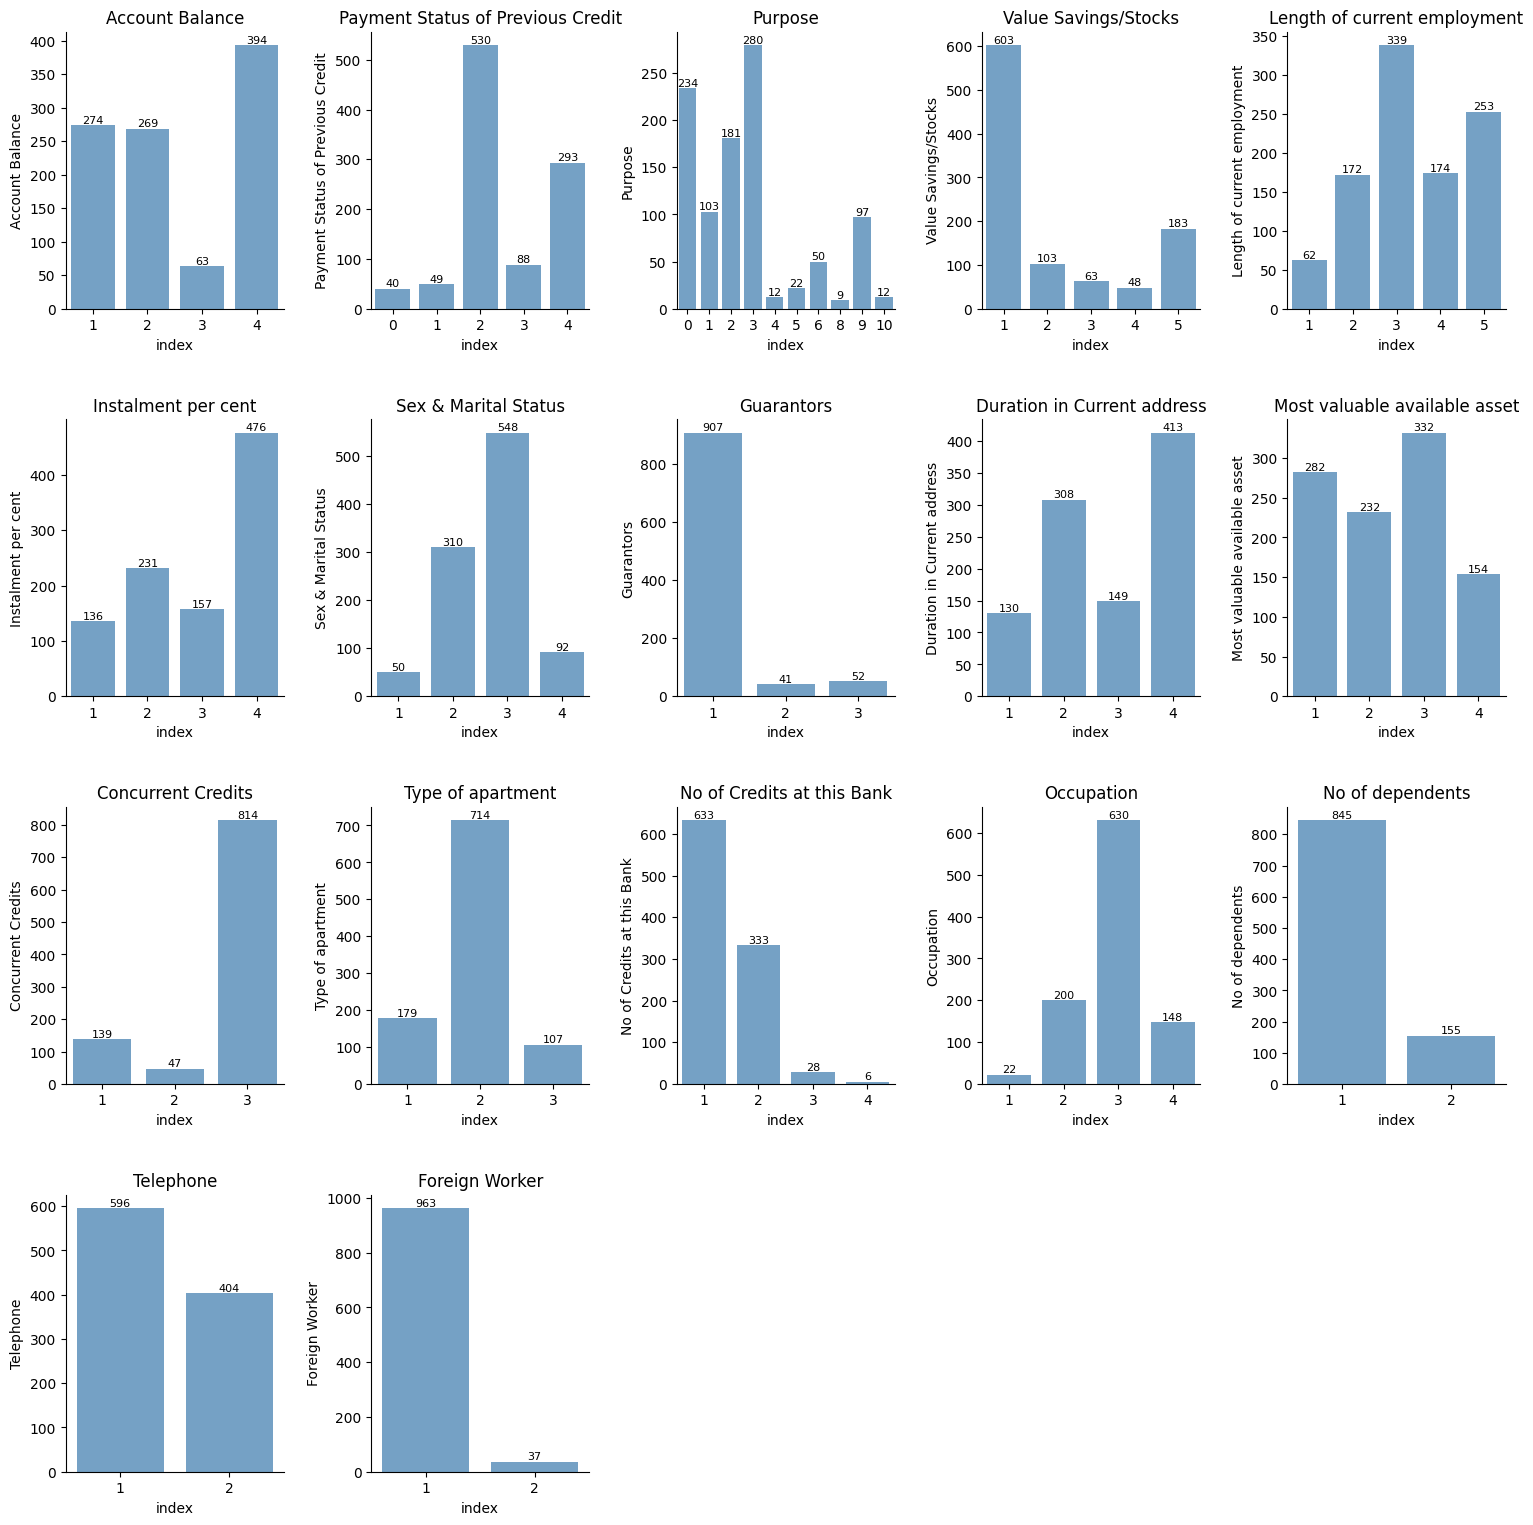

In [12]:
prep.plot_all_freq(german_credit_ds, (18, 16), variables['categorical'], 4, 5, spacing=0.01, fmt="{:.0f}", fontsize=8)

And then plot the odds of creditability by each of the categorical variables.

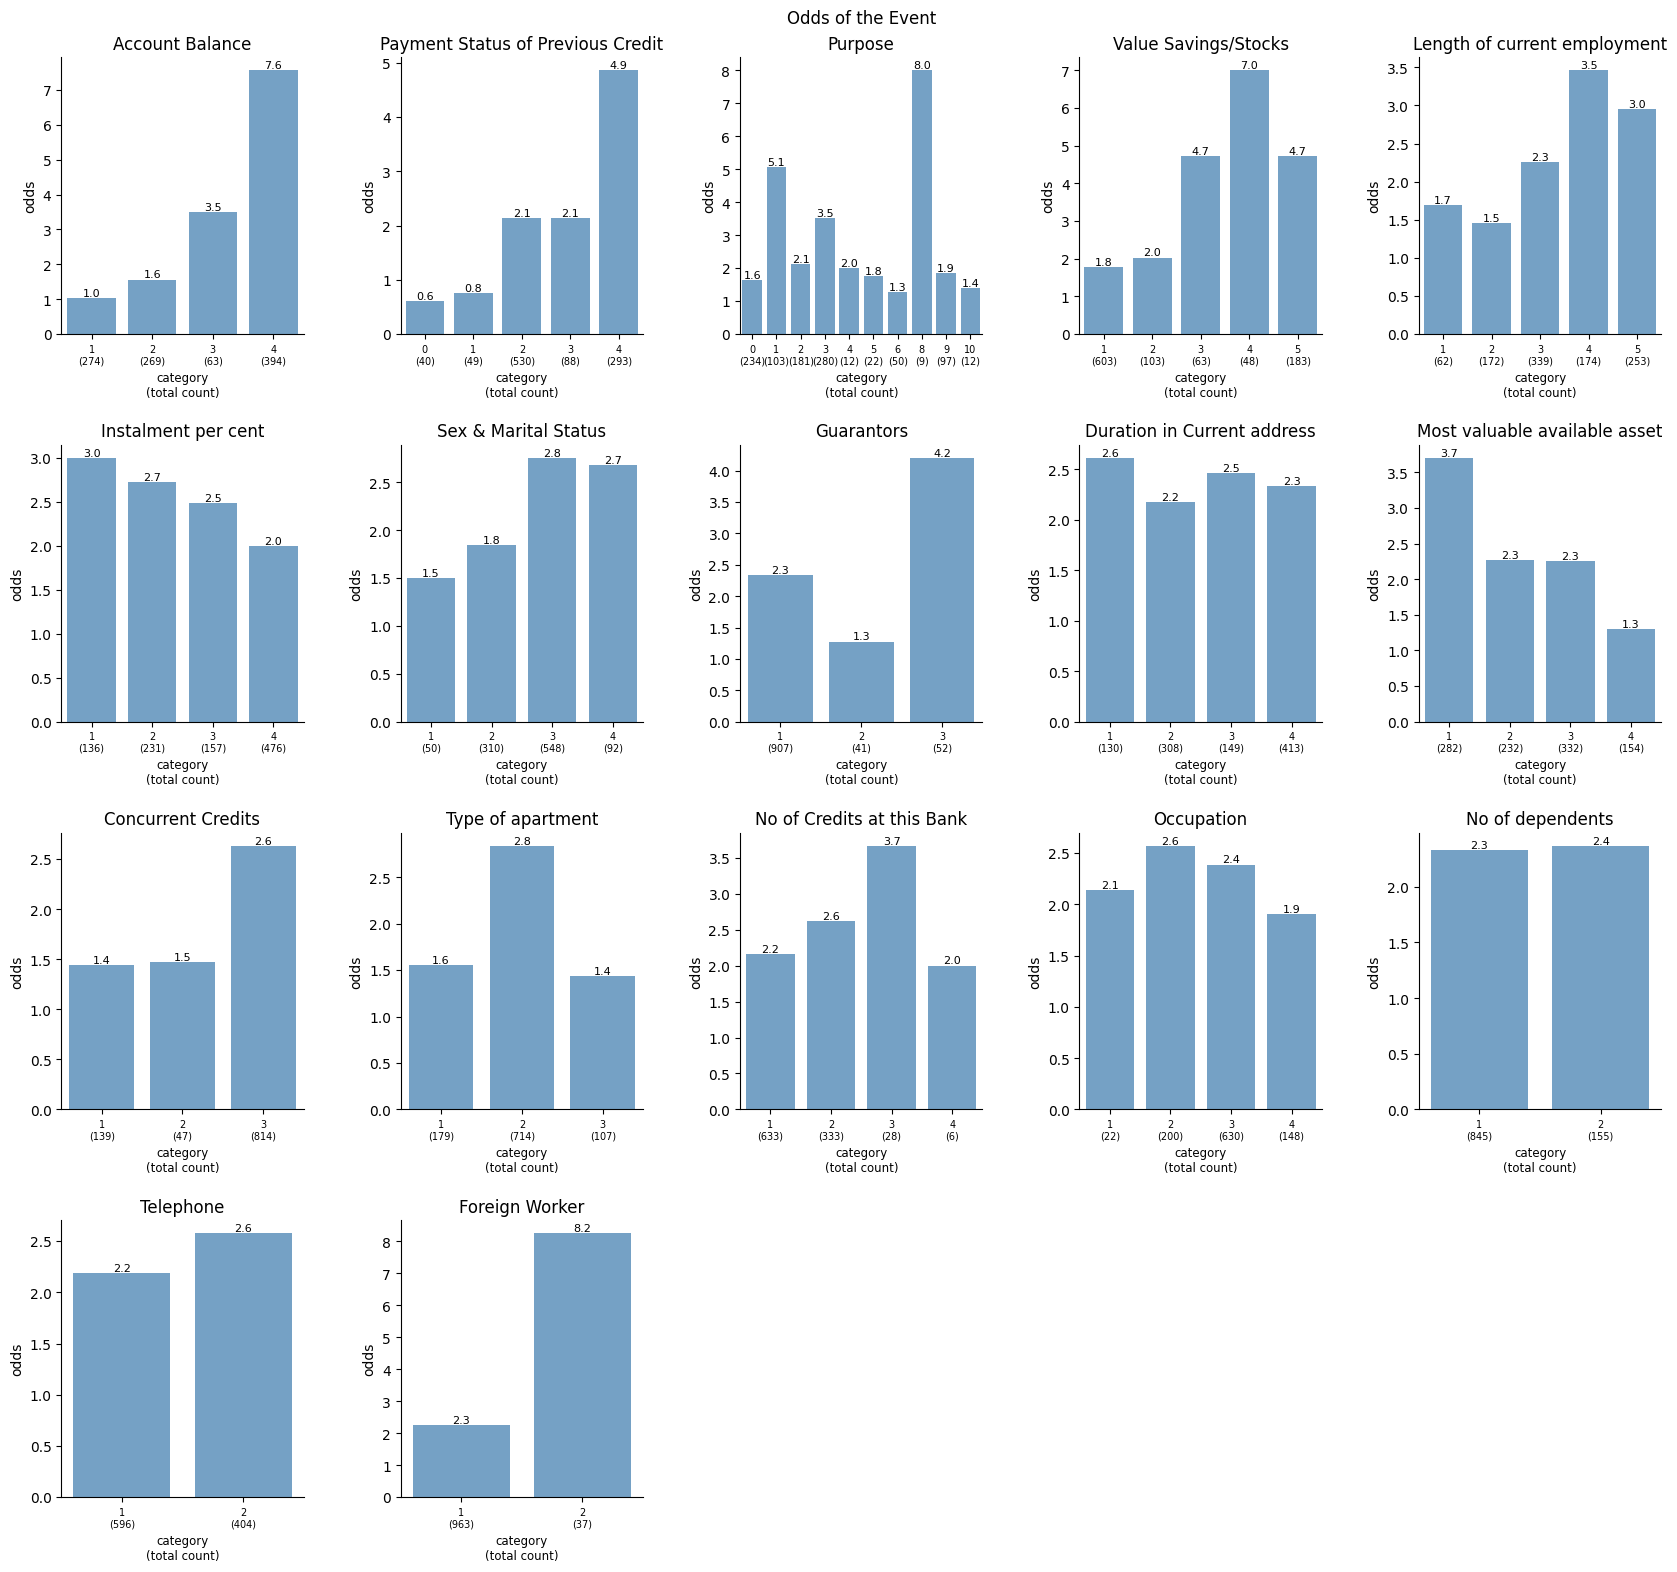

In [13]:
prep.plot_odds_cat(german_credit_ds, variables['categorical'], 'Creditability', (20, 16), 4, 5, spacing=0.01, fmt="{:.1f}", fontsize=8)

We can notice that for some categories, the number of observations are less than 30 which may lead to less accurate estimation. And the odds for some individual categories are similar. With that, we need to combine similar categories (in terms of odds and actually meaning) to either increase sample size or become more informative in terms of odds or both. Specifically, we will group:
* Payment Status of Previous Credit:
    * Combine 0, 1 to be 1: "Problematic of paying previous credits or problematic running account"
    * Combine 2, 3 to be 2: "No issues on the previous and current credits
    * Set 4 to be 3: "Paid back previous credit at this bank" 
* Purpose 
    * Combine 4, 5, 6 to be 4 as "TV or appliances and maintenance"
    * Combine 7, 8, 9, 10 to be 5 as "Education or Business"
* Value Savings/Stocks:
    * Combine 1, 2 to be 1: "< 100DM"
    * Set others to be category - 1
* Length of current employment:
    * combine 1, 2 to be 1: "< 1 year or unemployed
    * set others to be category - 1
* Sex & Marital Status:
    * Combine 3, 4 to be 3: " Married Male and Female regardless of marriage
* Guarantors:
    * combine 2, 3 to be 2: "Co-appliant or with Guarantor"
* Most valuable asset:
    * Combine 2, 3 to be 2: "car, life insurance or other"
    * Change 4 to be 3: "Ownership of house or land"
* Concurrent credits:
    * combine 1, 2 to be 1: "There are concurrent credits"
    * set 3 to be 2: "No further running credits"
* Type of apartment:
    * Combine 1, 3 to be 1: "Non-owner occupied: rented or free
* No. of Credits in this bank 
    * Combine 2, 3, 4 to be 2: "Two or more"
* Occupation:
    * combine 1, 2 to be 1:"unemployeed/unskilled"
    * set 3 to be 2: "skilled worker / skilled employee / minor civil servant"
    * set 4 to be 3: "executive / self-employed / higher civil servant|Nominal/Ordinal|"

In [14]:
# Payment Status of Previous Credit
german_credit_ds['Payment Status of Previous Credit-gp'] = np.where(german_credit_ds['Payment Status of Previous Credit'].isin([0, 1]), 1,
np.where(german_credit_ds['Payment Status of Previous Credit'].isin([2, 3]), 2, german_credit_ds['Payment Status of Previous Credit'] - 1))
# check
pd.crosstab(german_credit_ds['Payment Status of Previous Credit-gp'], german_credit_ds['Payment Status of Previous Credit'])

Payment Status of Previous Credit,0,1,2,3,4
Payment Status of Previous Credit-gp,,,,,
1,40,49,0,0,0
2,0,0,530,88,0
3,0,0,0,0,293


In [15]:
# Purpose
german_credit_ds['Purpose-gp'] = np.where(german_credit_ds['Purpose'].isin([4, 5, 6]), 4,
np.where(german_credit_ds['Purpose'].isin([7, 8, 9, 10]), 5, german_credit_ds['Purpose']))
pd.crosstab(german_credit_ds['Purpose-gp'], german_credit_ds['Purpose'])

Purpose,0,1,2,3,4,5,6,8,9,10
Purpose-gp,,,,,,,,,,
0,234,0,0,0,0,0,0,0,0,0
1,0,103,0,0,0,0,0,0,0,0
2,0,0,181,0,0,0,0,0,0,0
3,0,0,0,280,0,0,0,0,0,0
4,0,0,0,0,12,22,50,0,0,0
5,0,0,0,0,0,0,0,9,97,12


In [16]:
# Value Savings/Stocks
german_credit_ds['Value Savings/Stocks-gp'] = np.where(german_credit_ds['Value Savings/Stocks'].isin([1, 2]), 1, 
german_credit_ds['Value Savings/Stocks'] - 1)
pd.crosstab(german_credit_ds['Value Savings/Stocks-gp'], german_credit_ds['Value Savings/Stocks'])

Value Savings/Stocks,1,2,3,4,5
Value Savings/Stocks-gp,,,,,
1,603,103,0,0,0
2,0,0,63,0,0
3,0,0,0,48,0
4,0,0,0,0,183


In [17]:
# Length of current employment
german_credit_ds['Length of current employment-gp'] = np.where(german_credit_ds['Length of current employment'].isin([1, 2]), 1, 
german_credit_ds['Length of current employment'] - 1)
pd.crosstab(german_credit_ds['Length of current employment-gp'], german_credit_ds['Length of current employment'])

Length of current employment,1,2,3,4,5
Length of current employment-gp,,,,,
1,62,172,0,0,0
2,0,0,339,0,0
3,0,0,0,174,0
4,0,0,0,0,253


In [18]:
# Sex & Marital Status
german_credit_ds['Sex & Marital Status-gp'] = np.where(german_credit_ds['Sex & Marital Status'].isin([3, 4]), 3, german_credit_ds['Sex & Marital Status'])
pd.crosstab(german_credit_ds['Sex & Marital Status-gp'], german_credit_ds['Sex & Marital Status'])


Sex & Marital Status,1,2,3,4
Sex & Marital Status-gp,,,,
1,50,0,0,0
2,0,310,0,0
3,0,0,548,92


In [19]:
# Guarantors
german_credit_ds['Guarantors-gp'] = np.where(german_credit_ds['Guarantors'].isin([2, 3]), 2, german_credit_ds['Guarantors'])
pd.crosstab(german_credit_ds['Guarantors-gp'], german_credit_ds['Guarantors'])

Guarantors,1,2,3
Guarantors-gp,,,
1,907,0,0
2,0,41,52


In [20]:
# Most valuable available asset
german_credit_ds['Most valuable available asset-gp'] = np.where(german_credit_ds['Most valuable available asset'].isin([2, 3]), 2,
np.where(german_credit_ds['Most valuable available asset'].isin([4]), 3, german_credit_ds['Most valuable available asset']))
pd.crosstab(german_credit_ds['Most valuable available asset-gp'], german_credit_ds['Most valuable available asset'])

Most valuable available asset,1,2,3,4
Most valuable available asset-gp,,,,
1,282,0,0,0
2,0,232,332,0
3,0,0,0,154


In [21]:
# Concurrent Credits
german_credit_ds['Concurrent Credits-gp'] = np.where(german_credit_ds['Concurrent Credits'].isin([1, 2]), 1, german_credit_ds['Concurrent Credits']-1)
pd.crosstab(german_credit_ds['Concurrent Credits-gp'], german_credit_ds['Concurrent Credits'])

Concurrent Credits,1,2,3
Concurrent Credits-gp,,,
1,139,47,0
2,0,0,814


In [22]:
# Type of apartment
german_credit_ds['Type of apartment-gp'] = np.where(german_credit_ds['Type of apartment'].isin([1, 3]), 1, german_credit_ds['Type of apartment'])
pd.crosstab(german_credit_ds['Type of apartment-gp'], german_credit_ds['Type of apartment'])

Type of apartment,1,2,3
Type of apartment-gp,,,
1,179,0,107
2,0,714,0


In [23]:
# No of Credits at this Bank
german_credit_ds['No of Credits at this Bank-gp'] = np.where(german_credit_ds['No of Credits at this Bank'].isin([2, 3, 4]), 2, german_credit_ds['No of Credits at this Bank'])
# check
pd.crosstab(german_credit_ds['No of Credits at this Bank-gp'], german_credit_ds['No of Credits at this Bank'])

No of Credits at this Bank,1,2,3,4
No of Credits at this Bank-gp,,,,
1,633,0,0,0
2,0,333,28,6


In [24]:
# Occupation
german_credit_ds['Occupation-gp'] = np.where(german_credit_ds['Occupation'].isin([1, 2]), 1, german_credit_ds['Occupation'] - 1)
# check
pd.crosstab(german_credit_ds['Occupation-gp'], german_credit_ds['Occupation'])

Occupation,1,2,3,4
Occupation-gp,,,,
1,22,200,0,0
2,0,0,630,0
3,0,0,0,148


In [25]:
variables_new = prep.split_num_cat_target(german_credit_ds, 'Creditability', lvl_theta=10)
# Get the numeric variables
num_var_list = variables_new['numeric'].copy()
num_var_list.remove('Duration of Credit (month)')
num_var_list.remove('Credit Amount')
num_var_list.remove('Age (years)')
print(num_var_list)
# Get the categorical variables
cat_var_list = variables_new['categorical'].copy()
cat_var_list.remove('Payment Status of Previous Credit')
cat_var_list.remove('Purpose')
cat_var_list.remove('Value Savings/Stocks')
cat_var_list.remove('Length of current employment')
cat_var_list.remove('Sex & Marital Status')
cat_var_list.remove('Guarantors')
cat_var_list.remove('Most valuable available asset')
cat_var_list.remove('Concurrent Credits')
cat_var_list.remove('Type of apartment')
cat_var_list.remove('No of Credits at this Bank')
cat_var_list.remove('Occupation')
print(cat_var_list)

['Duration of Credit (month)-log', 'Credit Amount-log', 'Age (years)-log']
['Account Balance', 'Instalment per cent', 'Duration in Current address', 'No of dependents', 'Telephone', 'Foreign Worker', 'Payment Status of Previous Credit-gp', 'Purpose-gp', 'Value Savings/Stocks-gp', 'Length of current employment-gp', 'Sex & Marital Status-gp', 'Guarantors-gp', 'Most valuable available asset-gp', 'Concurrent Credits-gp', 'Type of apartment-gp', 'No of Credits at this Bank-gp', 'Occupation-gp']


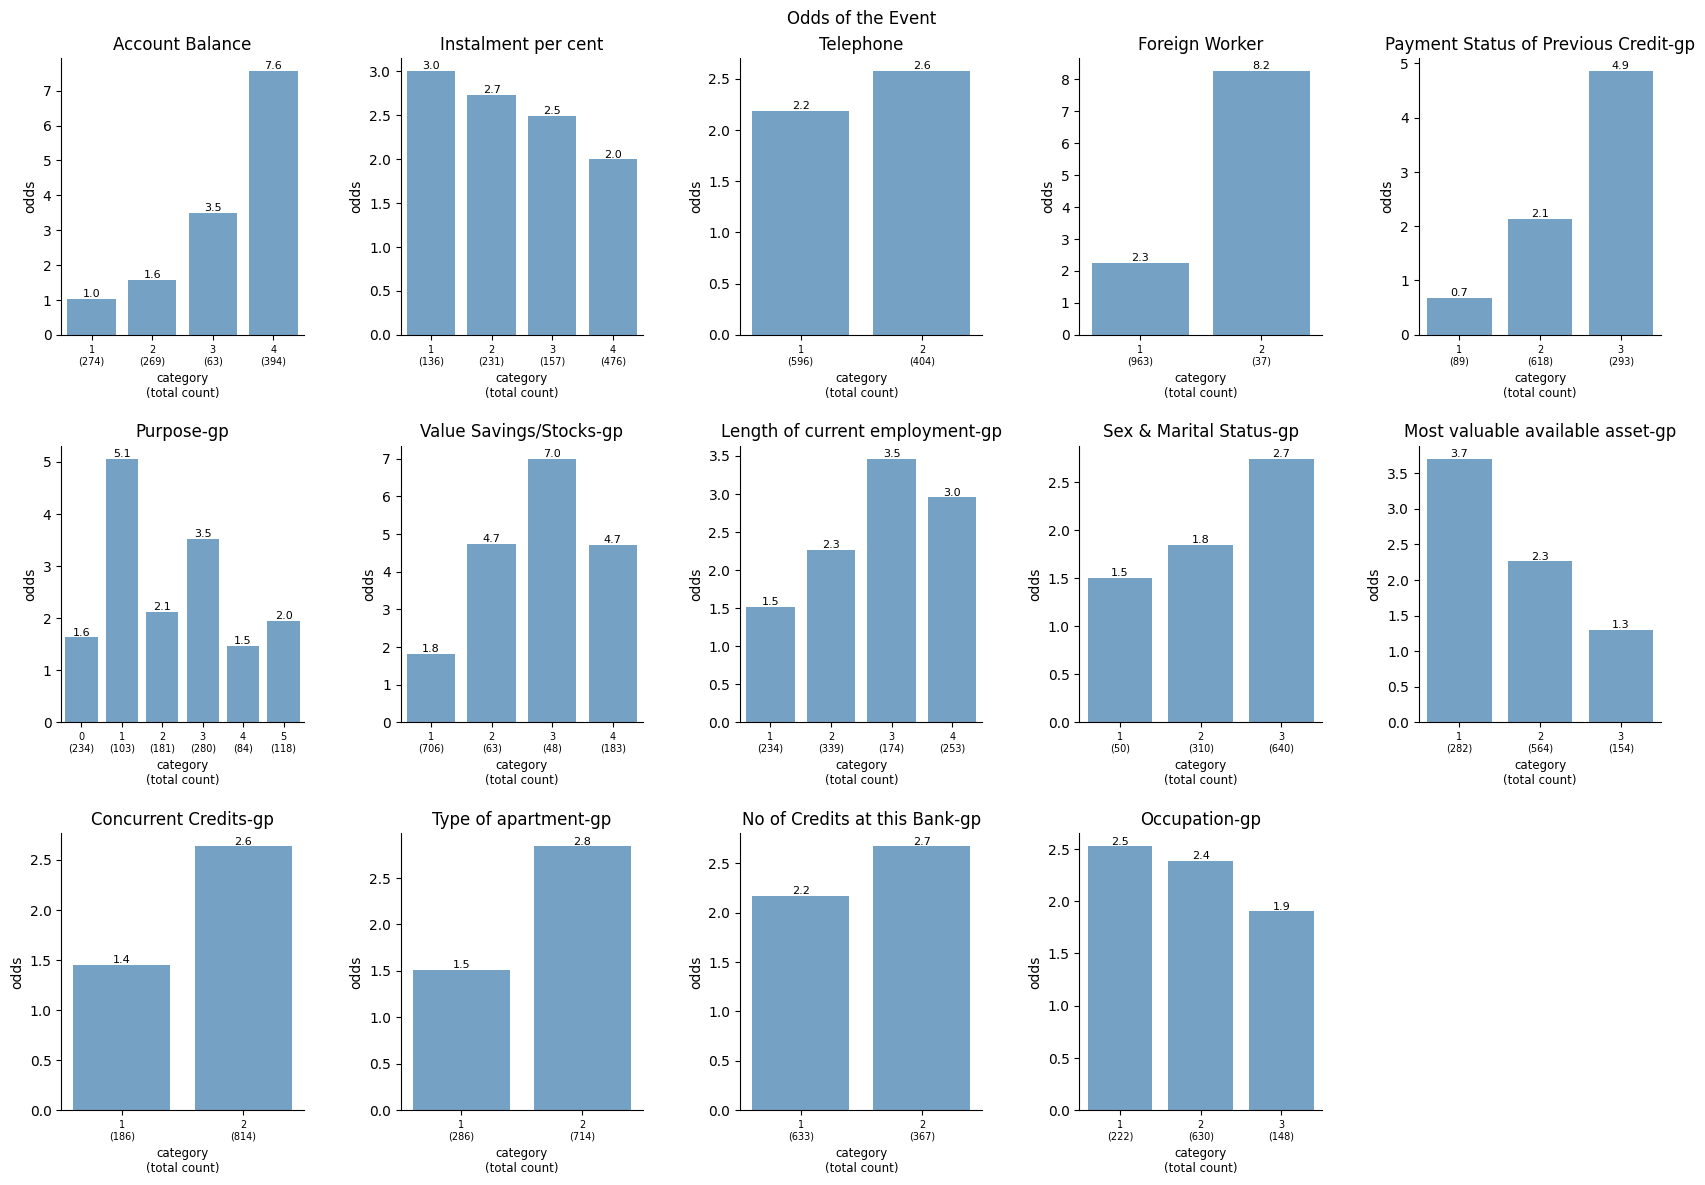

In [51]:

prep.plot_odds_cat(german_credit_ds, cat_var_list, 'Creditability', (20, 16), 4, 5, spacing=0.01, fmt="{:.1f}", fontsize=8)

We can use chi-squared test and mutual information to see the association between these categorical features with target variable.

In [27]:
mi_vals_list = []
for i in range(500):
    mi_vals_list.append(mutual_info_classif(german_credit_ds[cat_var_list], np.ravel(german_credit_ds[variables_new['target']])))
median_mi_vals = np.median(mi_vals_list, axis=0)
median_mi_vals
chi2_stats, p_vals = chi2(german_credit_ds[cat_var_list], np.ravel(german_credit_ds[variables_new['target']]))
table = {"Categorical Features": cat_var_list,
         "Mutual_information": median_mi_vals,
         "Chi2-statistics": chi2_stats,
         "P-Values": p_vals}
univ_cat_classif = pd.DataFrame(table)
univ_cat_classif.sort_values(by='Mutual_information', ascending=False)

,Categorical Features,Mutual_information,Chi2-statistics,P-Values
0,Account Balance,0.063983,75.474269,3.702000e-18
6,Payment Status of Previous Credit-gp,0.028575,8.905108,2.843741e-03
8,Value Savings/Stocks-gp,0.017422,24.321289,8.153295e-07
7,Purpose-gp,0.012294,0.436469,5.088318e-01
12,Most valuable available asset-gp,0.011462,5.243081,2.203422e-02
9,Length of current employment-gp,0.007204,6.961881,8.326443e-03
14,Type of apartment-gp,0.006988,2.209368,1.371748e-01
13,Concurrent Credits-gp,0.006457,1.071140,3.006881e-01
5,Foreign Worker,0.003909,0.231483,6.304266e-01
10,Sex & Marital Status-gp,0.003842,1.242876,2.649176e-01


In [28]:
univ_cat_classif.loc[(univ_cat_classif['Mutual_information']  == 0) & (univ_cat_classif['P-Values'] >= 0.05), 'Categorical Features'].to_list()

['Duration in Current address', 'Guarantors-gp', 'Occupation-gp']

We will select categorical variables that have non-zero mutual information or chi2 test significant (P-value < 0.05).

In [29]:
remove_list = ['Duration in Current address', 'No of dependents', 'Guarantors-gp']
cat_var_list = [item for item in cat_var_list if not(item in remove_list)]
cat_var_list

['Account Balance',
 'Instalment per cent',
 'Telephone',
 'Foreign Worker',
 'Payment Status of Previous Credit-gp',
 'Purpose-gp',
 'Value Savings/Stocks-gp',
 'Length of current employment-gp',
 'Sex & Marital Status-gp',
 'Most valuable available asset-gp',
 'Concurrent Credits-gp',
 'Type of apartment-gp',
 'No of Credits at this Bank-gp',
 'Occupation-gp']

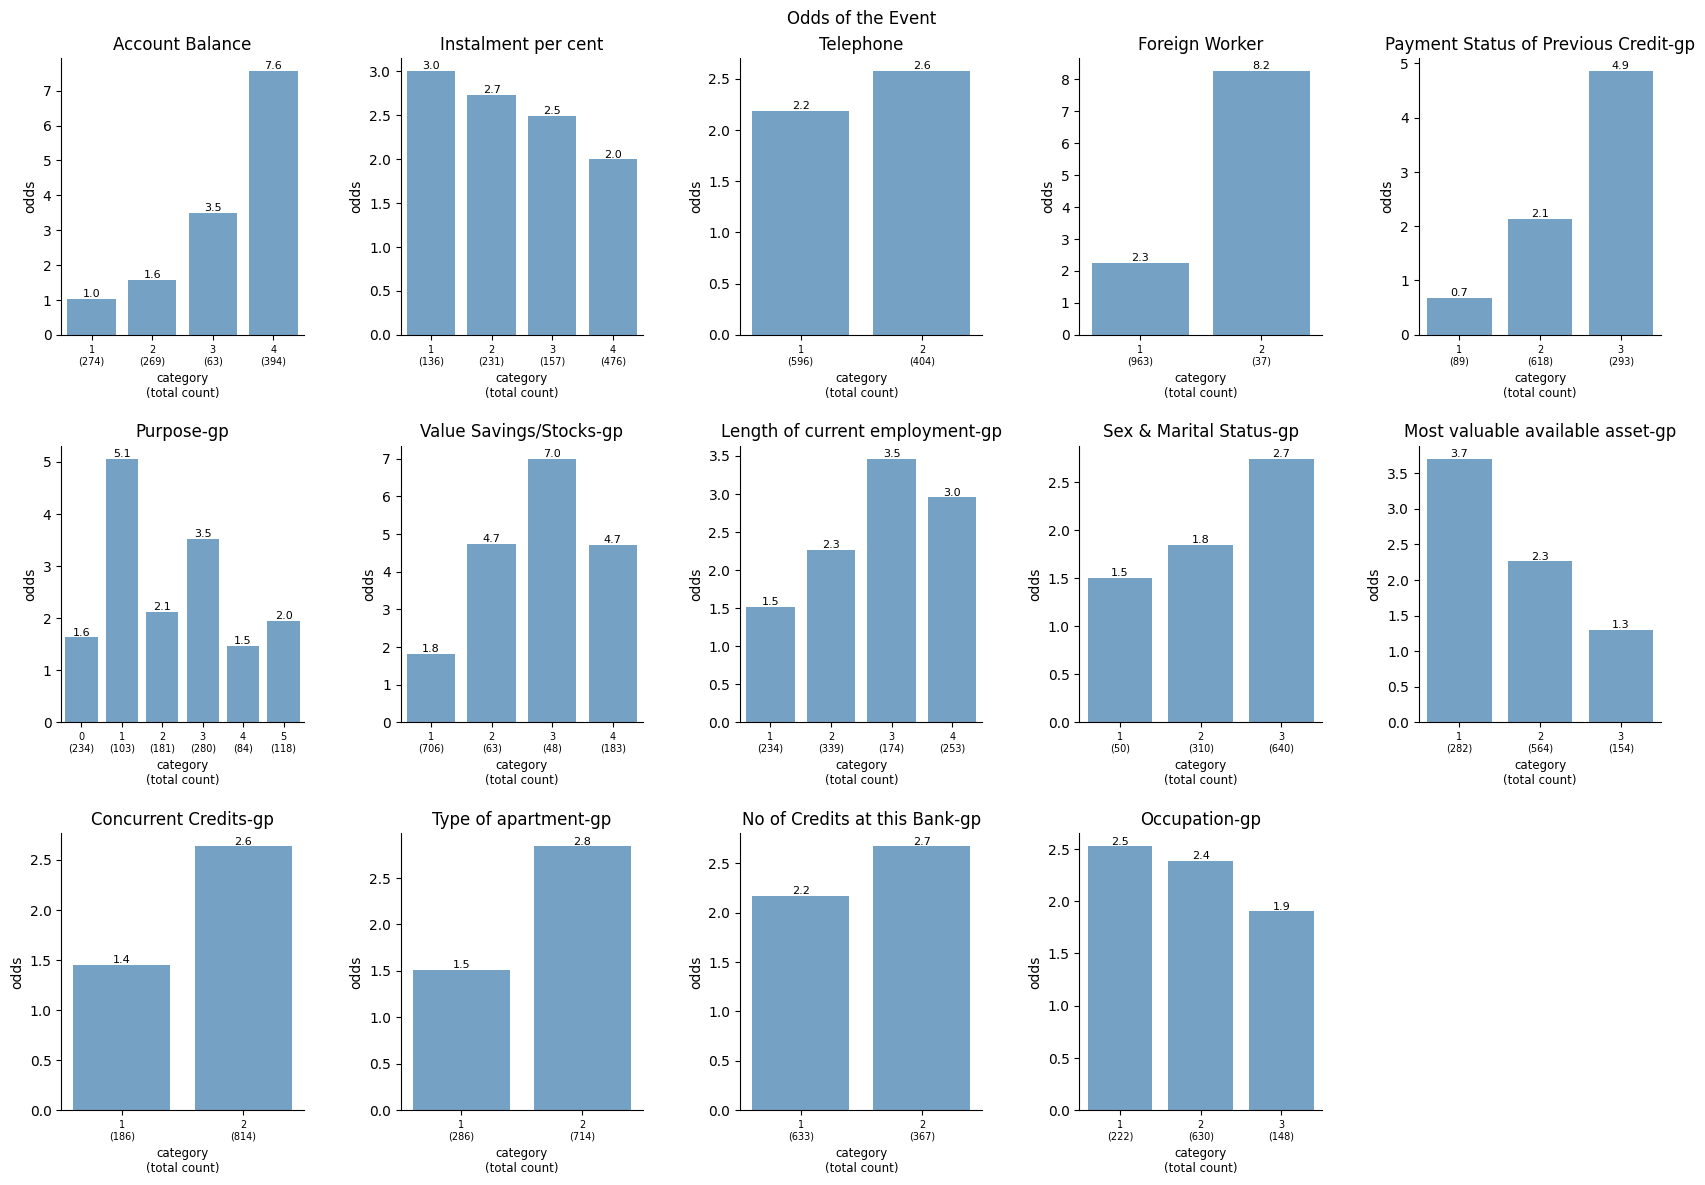

In [50]:
prep.plot_odds_cat(german_credit_ds, cat_var_list, 'Creditability', (20, 16), 4, 5, spacing=0.01, fmt="{:.1f}", fontsize=8)

### 3.2 Multivariate analysis

In [31]:
# Correlations between numeric variables
# Numeric variables are Duration of Credit (month), Credit Amount, Age (years)

german_credit_ds[num_var_list].corr()

,Duration of Credit (month)-log,Credit Amount-log,Age (years)-log
Duration of Credit (month)-log,1.000000,0.622254,-0.049655
Credit Amount-log,0.622254,1.000000,0.023313
Age (years)-log,-0.049655,0.023313,1.000000


### 3.3 Prepare Data for model training

Even though there are some correlation between duration of credit and credit amount but it is not greater than 75%, we can keep both since both can provide additional information.

In [33]:

# Categorical variables that are used for encoding:
encode_cat_list = cat_var_list #['Value Savings/Stocks-gp', 'Purpose-gp', 'Length of current employment-gp']
selected_var_list = ['Creditability'] + num_var_list + cat_var_list 
print(selected_var_list)
print(len(selected_var_list))

['Creditability', 'Duration of Credit (month)-log', 'Credit Amount-log', 'Age (years)-log', 'Account Balance', 'Instalment per cent', 'Telephone', 'Foreign Worker', 'Payment Status of Previous Credit-gp', 'Purpose-gp', 'Value Savings/Stocks-gp', 'Length of current employment-gp', 'Sex & Marital Status-gp', 'Most valuable available asset-gp', 'Concurrent Credits-gp', 'Type of apartment-gp', 'No of Credits at this Bank-gp', 'Occupation-gp']
18


In [34]:
# Original
german_credit_selected = german_credit_ds[selected_var_list]
# One-hot encoding for nominal variables
encoder = ce.OneHotEncoder(cols = encode_cat_list, handle_unknown='return_nan', return_df=True, use_cat_names=True)
german_credit_ds_encoded=encoder.fit_transform(german_credit_selected)
german_credit_ds_encoded.head()

,Creditability,Duration of Credit (month)-log,Credit Amount-log,Age (years)-log,Account Balance_1.0,Account Balance_2.0,Account Balance_4.0,Account Balance_3.0,Instalment per cent_4.0,Instalment per cent_2.0,...,Most valuable available asset-gp_3.0,Concurrent Credits-gp_2.0,Concurrent Credits-gp_1.0,Type of apartment-gp_1.0,Type of apartment-gp_2.0,No of Credits at this Bank-gp_1.0,No of Credits at this Bank-gp_2.0,Occupation-gp_2.0,Occupation-gp_1.0,Occupation-gp_3.0
0,1,2.890372,6.955593,3.044522,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,2.197225,7.937017,3.583519,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,2.484907,6.734592,3.135494,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,2.484907,7.660114,3.663562,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,2.484907,7.682943,3.637586,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


We will then split training and testing samples and standardize both samples.

In [35]:
X_orig, y = german_credit_ds_encoded.iloc[:,1:], german_credit_ds_encoded.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.3, random_state=0)

# Standardize transformed the training and testing data after the split.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# Transform X_test using the mean and variance of training data
X_test = scaler.transform(X_test)

## 4. Classification
This section we will try four classification methods to classify customers creditability. The evaluation metric we use is `auc`(area under the curve) for model build. We can then use other metrics (accuracy, f1_score) for method comparison.

### 4.1 Logistic Regression

In [36]:

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Defined the parameters
## The solver to be used for estimating coefficients
solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
## Penalty term to be used
penalty = ['l2']
## Inverse of egularization strength, the larger the less stringent
c = [100, 10, 1.0, 0.3, 0.1, 0.01, 0.001]
## maximum iteration taken for algorithms to converge
max_iter = [10000]

# Combine all parameters
params = {'solver': solver, 'penalty': penalty, 'C': c, 'max_iter': max_iter}


# Create the logistic regression model
clf = LogisticRegression()

# Cross validation generator
cv_repeat = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state = 0)

# Grid Search the best parameter for the solver and c
grid_search = GridSearchCV(estimator=clf, param_grid=params, n_jobs=-1, cv=cv_repeat, scoring='roc_auc')
grid_search_result = grid_search.fit(X_train, y_train)

# Output results
print("Best: %f using %s" % (grid_search_result.best_score_, grid_search_result.best_params_))
# Fit the final model
best_param = grid_search_result.best_params_
final_logit_model = LogisticRegression(solver=best_param['solver'], penalty='l2', C=best_param['C'], max_iter=10000, random_state=0 )
final_logit_model.fit(X_train, y_train)
y_train_pred = final_logit_model.predict_proba(X_train)
y_test_pred = final_logit_model.predict_proba(X_test)
print(f'Trainig AUC Score: {roc_auc_score(y_train, y_train_pred[:, 1])}')
print(f'Test AUC Score: {roc_auc_score(y_test, y_test_pred[:, 1])}')


Best: 0.775850 using {'C': 0.01, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}
Trainig AUC Score: 0.8222
Test AUC Score: 0.8020499999999999


The following plots the confusion matrix for the test dataset.

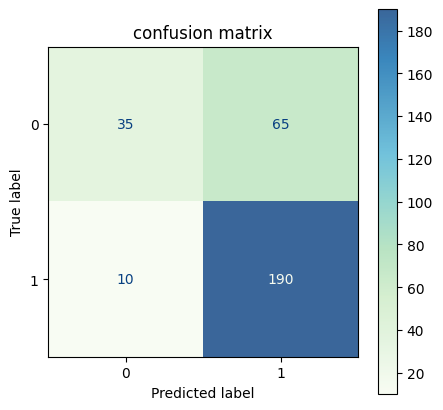

In [37]:
perfc.plot_confusion_matrix(final_logit_model, X_test, y_test)

The following summarizes the feature importance by the coefficients from the logistic regression. Note that if the color is orange-red, then the coefficient is negative.

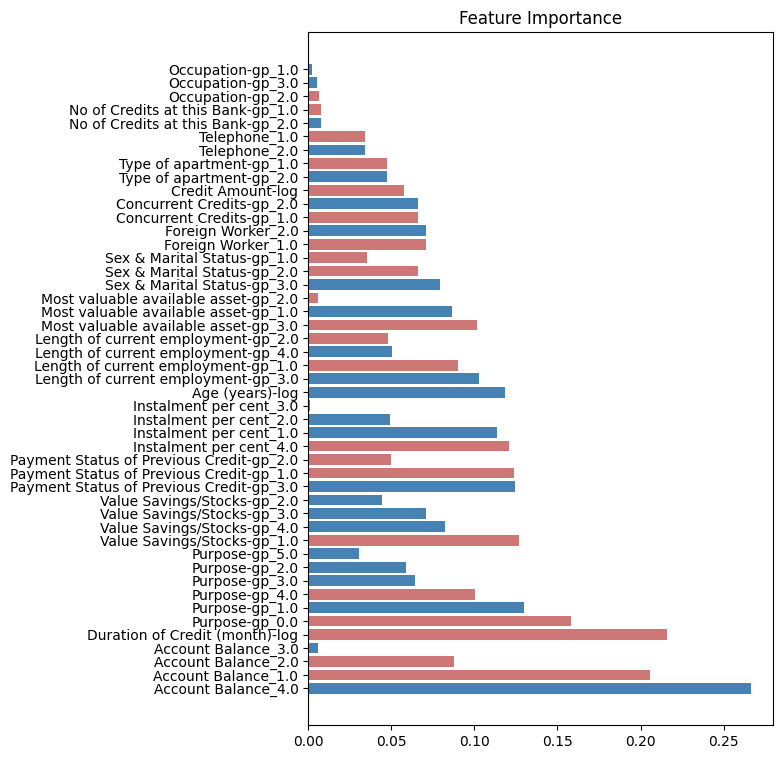

In [38]:
logit_fi_df = perfc.plot_feature_importance(final_logit_model, german_credit_ds_encoded.columns[1:], encode_cat_list, figsize=(6, 9))

### 4.2 Random Forest

In [39]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Defined the parameters

## The number of trees in the forest.i.e. number of bagging samples B.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 6)]
## Use 'Gini' as the objective function for the recursive-binary-split
criterion = ['gini']
## The maximum depth of each tree
max_depth = [int(x) for x in np.linspace(1, 10, num=10)]
## The minimum number of samples required to split an internal node.
min_samples_split = [2, 4, 6, 8]
## The minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 3, 5, 7]
## the number of features to consider at each split.
max_features = ['sqrt', 'log2']
## Whether bootstrap samples are used when building trees.
bootstrap = [True]
## Whether to use out-of-bag samples to estimate the generalization score.
oob_score = [False]
## If bootstrap is True, the number of samples to draw from X to train each base estim)
max_samples = [0.1, 0.3, 0.5, 0.7, 0.9, 1]


params = {'n_estimators': n_estimators, 
          'criterion': criterion, 
          'max_depth': max_depth, 
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf, 
          'max_features': max_features, 
          'bootstrap': bootstrap, 
          'oob_score': oob_score, 
          'max_samples': max_samples
          }


# Create the RandomForest model
clf = RandomForestClassifier()

# Cross validation generator
#cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0)
cv_repeat = RepeatedStratifiedKFold(n_splits = 5, n_repeats=2, random_state = 0)

# Randomized Search the best parameter for the solver and c
random_search = RandomizedSearchCV(estimator=clf, param_distributions=params, n_iter = 100, n_jobs=-1, cv=cv_repeat, scoring='roc_auc')
random_search_result = random_search.fit(X_train, y_train)

# Output results
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

# Fit the final model
best_param = random_search_result.best_params_
final_rf_model = RandomForestClassifier(n_estimators=best_param['n_estimators'], 
                                        criterion=best_param['criterion'],
                                        max_depth=best_param['max_depth'], 
                                        min_samples_split=best_param['min_samples_split'], 
                                        min_samples_leaf=best_param['min_samples_leaf'], 
                                        max_features=best_param['max_features'], 
                                        bootstrap=best_param['bootstrap'], 
                                        oob_score=best_param['oob_score'], 
                                        max_samples=best_param['max_samples'], 
                                        random_state=23 #Controls both the randomness of the bootstrapping of the samples used when building trees 
)
final_rf_model.fit(X_train, y_train)
y_train_pred = final_rf_model.predict_proba(X_train)
y_test_pred = final_rf_model.predict_proba(X_test)
print(f'Trainig AUC Score: {roc_auc_score(y_train, y_train_pred[:, 1])}')
print(f'Test AUC Score: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Best: 0.783875 using {'oob_score': False, 'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_samples': 0.3, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}
Trainig AUC Score: 0.89777
Test AUC Score: 0.8072


The following plots the confusion matrix for the test set from random forest model.

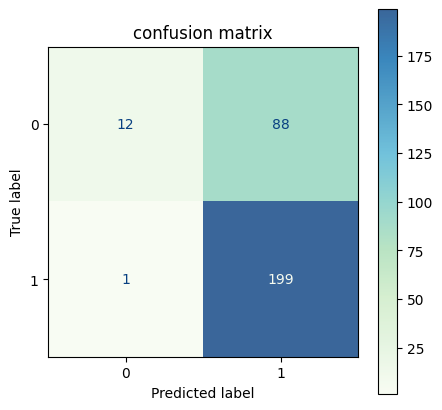

In [40]:
perfc.plot_confusion_matrix(final_rf_model, X_test, y_test)

The following plots the feature importance from random forest model.

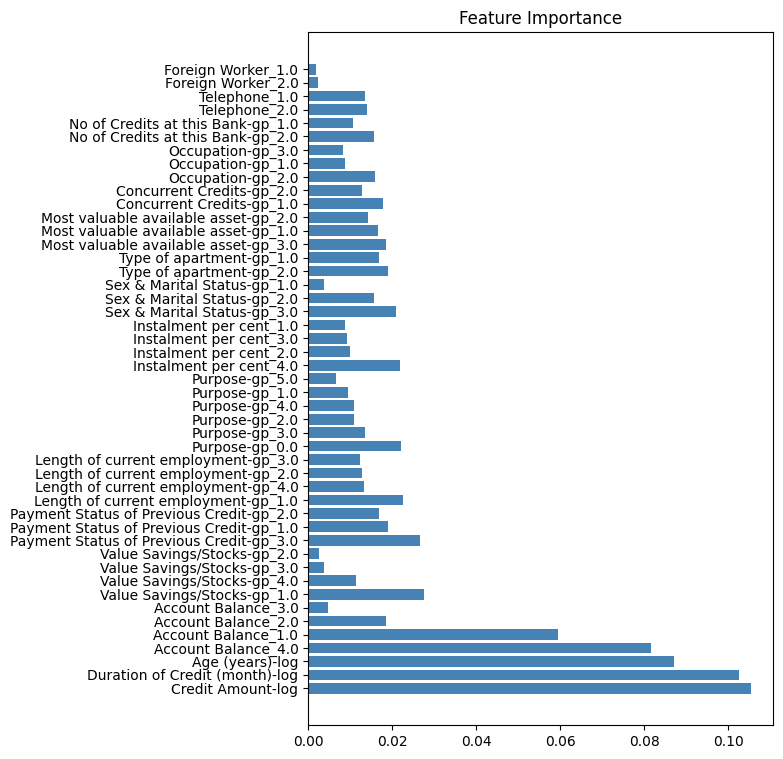

In [41]:
rf_fi_df = perfc.plot_feature_importance(final_rf_model, german_credit_ds_encoded.columns[1:], encode_cat_list, figsize=(6, 9))

### 4.3 XGBoost

In [42]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# Defined the parameters

## Number of boosting trees to be fitted
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)]
## Loss function to be used
objective = ['binary:logistic']
## Maximum depth of a tree
max_depth = [int(x) for x in np.linspace(1, 5, num=5)]
## shringage ratio for updating the estimator to prevent overfitting
learning_rate = [0.01, 0.05, 0.1]
## Minum loss reduction required for a node to split
gamma = [0, 0.01, 0.05, 0.1]
## Subsample ratio of columns when building a new boosted tree
colsample_bytree = [0.25, 0.3, 0.5]
## Subsample ratio of observations when building a new boosted tree
subsample = [0.1, 0.3, 0.5, 0.7]
# L2 regularization strength. The higher the more stringent
reg_lambda = [100, 200, 300]
# L1 regularization strength. The higher the more stringent
#reg_alpha = [0, 0.5, 1.0, 5.0]
## Maximum number of node to be added
max_leaves =  [6, 8, 10]
eval_metric = 'auc'
## Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances)
scale_pos_weight = [0.4, 0.6, 1]


params = {'n_estimators': n_estimators, 
          'objective': objective, 
          'max_depth': max_depth, 
          'max_leaves': max_leaves,
          'learning_rate': learning_rate, 
          'gamma': gamma, 
          'colsample_bytree': colsample_bytree,
          'subsample': subsample,
          'reg_lambda': reg_lambda,
          #'reg_alpha': reg_alpha,
          'scale_pos_weight': scale_pos_weight
           }


# Create the RandomForest model
clf = xgb.XGBClassifier()

# Cross validation generator
#cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0)
cv_repeat = RepeatedStratifiedKFold(n_splits = 5, n_repeats=2, random_state = 46)

# random Search the best parameter for the solver and c
random_search = RandomizedSearchCV(estimator=clf, param_distributions=params, n_iter = 100, n_jobs=-1, cv=cv_repeat, scoring='roc_auc')
# Grid Search after reducing the parameter list
#cv_search = GridSearchCV(estimator=clf, param_grid=params, n_jobs=-1, cv=cv_repeat, scoring='roc_auc')
random_search_result = random_search.fit(X_train, y_train)

# Output results
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

# Fit the final model
best_param = random_search_result.best_params_
final_xgb_model = xgb.XGBClassifier(n_estimators=best_param['n_estimators'], 
                                    objective=best_param['objective'], 
                                    max_depth=best_param['max_depth'], 
                                    max_leaves=best_param['max_leaves'],
                                    learning_rate=best_param['learning_rate'], 
                                    gamma=best_param['gamma'], 
                                    colsample_bytree=best_param['colsample_bytree'],
                                    subsample=best_param['subsample'],
                                    reg_lambda=best_param['reg_lambda'],
                                    #reg_alpha=best_param['reg_alpha'], 
                                    scale_pos_weight=best_param['scale_pos_weight'],
                                    random_state = 57#Controls both the randomness of the bootstrapping of the samples used when building trees 
)
final_xgb_model.fit(X_train, y_train)
y_train_pred = final_xgb_model.predict_proba(X_train)
y_test_pred = final_xgb_model.predict_proba(X_test)
print(f'Trainig AUC Score: {roc_auc_score(y_train, y_train_pred[:, 1])}')
print(f'Test AUC Score: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Best: 0.778450 using {'subsample': 0.5, 'scale_pos_weight': 0.6, 'reg_lambda': 100, 'objective': 'binary:logistic', 'n_estimators': 125, 'max_leaves': 10, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.3}
Trainig AUC Score: 0.8428100000000001
Test AUC Score: 0.8028000000000002


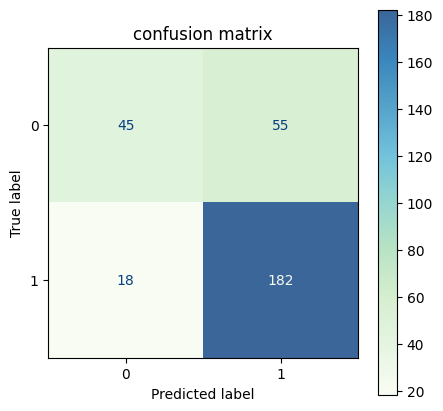

In [43]:
perfc.plot_confusion_matrix(final_xgb_model, X_test, y_test)

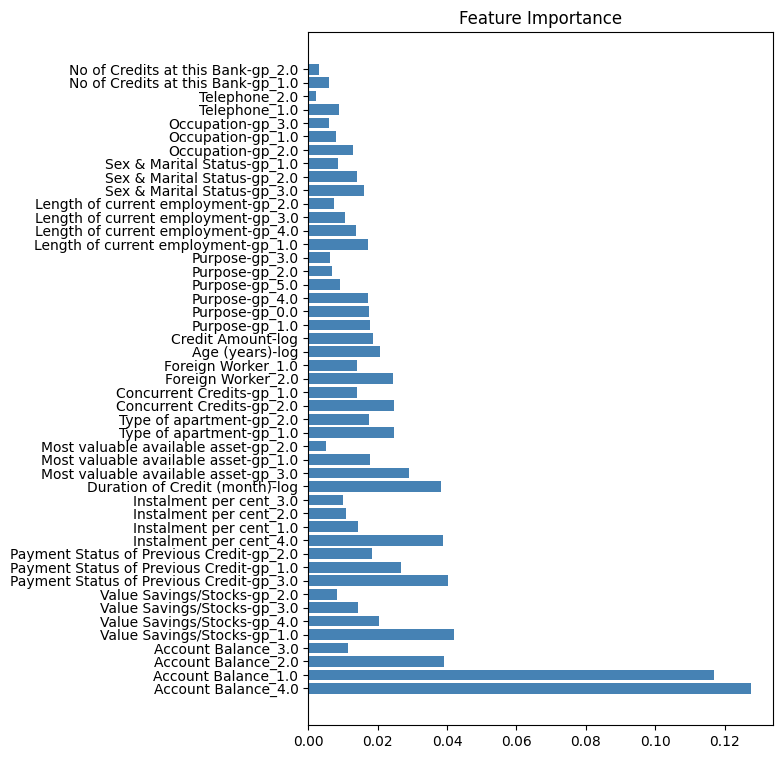

In [44]:
xgb_fi_df = perfc.plot_feature_importance(final_xgb_model, german_credit_ds_encoded.columns[1:], encode_cat_list, figsize=(6, 9))

### 4.4 LightGBM

In [45]:
import lightgbm as lgbm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# Defined the parameters

## Number of boosted tree
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)]
## Objective for the task
objective = ['binary']
## Maximum depth of a boosted tree
max_depth = [int(x) for x in np.linspace(1, 5, num=5)]
## Number of leaves for each tree
num_leaves = [6, 8, 10]
## Shringage ratio for updating the estimator to prevent overfitting
learning_rate = [0.01, 0.05, 0.1]
## Minimum loss reduction for each node split
min_split_gain = [0, 0.01, 0.05, 0.1]
## Subsample ratio of columns when building a new boosted tree
colsample_bytree = [0.1, 0.3, 0.5]
## Subsample ratio of observations when building a new boosted tree
subsample = [0.1, 0.3, 0.5]
## L2 regularization strength. The higher the number the more stringent
reg_lambda = [100, 200, 300]
## L1 regularization strength. The higher the number the more stringent
#reg_alpha = [0, 0.5, 1.0, 5.0, 10.0]
## Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances)
scale_pos_weight = [0.6]


params = {'n_estimators': n_estimators, 
          'objective': objective, 
          'max_depth': max_depth, 
          'num_leaves': num_leaves,
          'learning_rate': learning_rate, 
          'min_split_gain': min_split_gain, 
          'colsample_bytree': colsample_bytree,
          'subsample': subsample,
          'reg_lambda': reg_lambda,
          #'reg_alpha': reg_alpha,
          'scale_pos_weight':scale_pos_weight
           }


# Create the RandomForest model
clf = lgbm.LGBMClassifier()

# Cross validation generator
#cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0)
cv_repeat = RepeatedStratifiedKFold(n_splits = 5, n_repeats=2, random_state = 67)

# Randomized Search the best parameter for the solver and c
cv_search = RandomizedSearchCV(estimator=clf, param_distributions=params, n_iter = 100, n_jobs=-1, cv=cv_repeat, scoring='roc_auc')
# Grid Search after reducing the parameter list
#cv_search = GridSearchCV(estimator=clf, param_grid=params, n_jobs=-1, cv=cv_repeat, scoring='roc_auc')
cv_search_result = cv_search.fit(X_train, y_train)

# Output results
print("Best: %f using %s" % (cv_search_result.best_score_, cv_search_result.best_params_))

# Fit the final model
best_param = cv_search_result.best_params_
final_lgbm_model = lgbm.LGBMClassifier(n_estimators=best_param['n_estimators'], 
                                       objective=best_param['objective'], 
                                       max_depth=best_param['max_depth'], 
                                       num_leaves=best_param['num_leaves'],
                                       learning_rate=best_param['learning_rate'], 
                                       min_split_gain=best_param['min_split_gain'], 
                                       colsample_bytree=best_param['colsample_bytree'],
                                       subsample=best_param['subsample'],
                                       reg_lambda=best_param['reg_lambda'],
                                       #reg_alpha=best_param['reg_alpha'], 
                                       scale_pos_weight=best_param['scale_pos_weight'],
                                       random_state = 89 #Controls both the randomness of the bootstrapping of the samples used when building trees 
)
final_lgbm_model.fit(X_train, y_train)
y_train_pred = final_lgbm_model.predict_proba(X_train)
y_test_pred = final_lgbm_model.predict_proba(X_test)
print(f'Trainig AUC Score: {roc_auc_score(y_train, y_train_pred[:, 1])}')
print(f'Test AUC Score: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Best: 0.772100 using {'subsample': 0.3, 'scale_pos_weight': 0.6, 'reg_lambda': 100, 'objective': 'binary', 'num_leaves': 10, 'n_estimators': 200, 'min_split_gain': 0, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
Trainig AUC Score: 0.8529800000000001
Test AUC Score: 0.8057


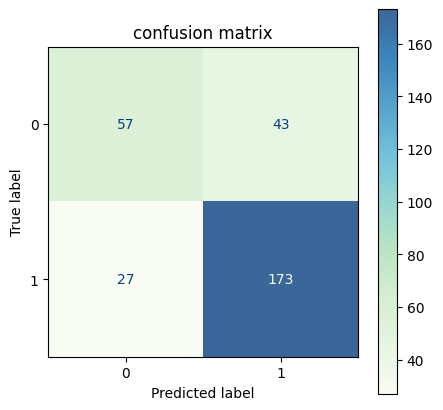

In [46]:
perfc.plot_confusion_matrix(final_lgbm_model, X_test, y_test)

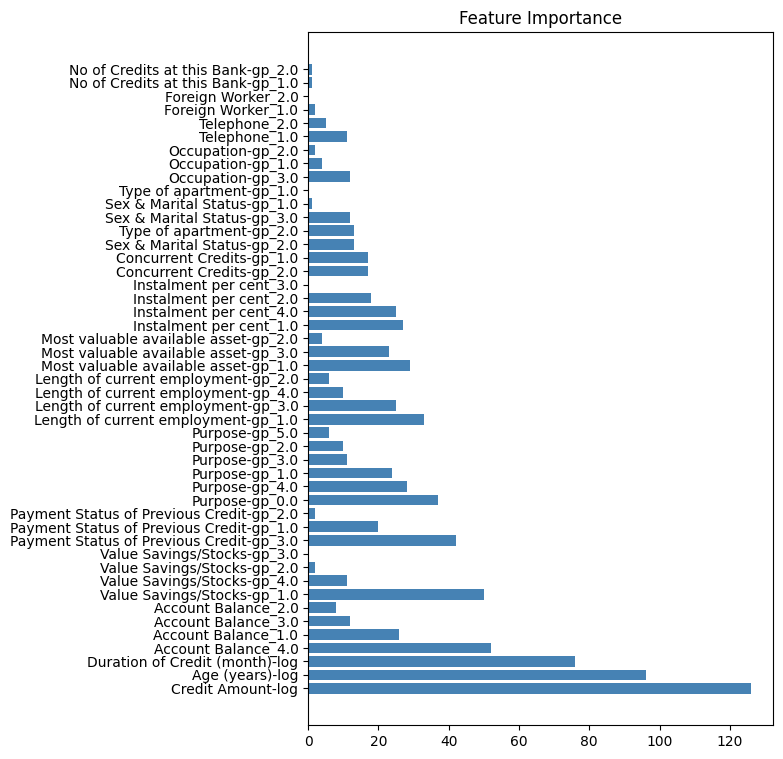

In [47]:
lgbm_fi_df = perfc.plot_feature_importance(final_lgbm_model, german_credit_ds_encoded.columns[1:], encode_cat_list, figsize=(6,9))

## 5. Comparison and Evaluation of the Classification Methods

In [48]:
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score
def clf_metrics_comp(list_estimator, X_test, y_test):
    # Type of estimator
    estimator_name = []
    # test accuracy score
    balanced_accuracy_list = []
    # test auc score
    auc_list =[]
    # test F1 score
    f1_list = []
    for est in list_estimator:
        estimator_name.append(type(est))
        y_test_pred = est.predict_proba(X_test)
        y_test_pred_label = est.predict(X_test)
        balanced_accuracy_list.append(balanced_accuracy_score(y_test, y_test_pred_label))
        auc_list.append(roc_auc_score(y_test, y_test_pred[:, 1]))
        f1_list.append(f1_score(y_test, y_test_pred_label))
    return pd.DataFrame({'model': estimator_name, 
                         'balanced_accuracy_score': balanced_accuracy_list, 
                         'auc_score': auc_list,
                         'f1_score': f1_list})

clf_metrics_comp([final_logit_model, final_rf_model, final_xgb_model, final_lgbm_model], X_test, y_test)

,model,balanced_accuracy_score,auc_score,f1_score
0,<class 'sklearn.linear_model._logistic.Logisti...,0.6500,0.80205,0.835165
1,<class 'sklearn.ensemble._forest.RandomForestC...,0.5575,0.80720,0.817248
2,<class 'xgboost.sklearn.XGBClassifier'>,0.6800,0.80280,0.832952
3,<class 'lightgbm.sklearn.LGBMClassifier'>,0.7175,0.80570,0.831731


In [49]:
# features importance by different model
pd.DataFrame({'Logistic Regression': logit_fi_df['var_name_lvl1'].unique(),
              'Random Forest': rf_fi_df['var_name_lvl1'].unique(),
              'XGBoost': xgb_fi_df['var_name_lvl1'].unique(),
              'LightGBM': lgbm_fi_df['var_name_lvl1'].unique()
})

,Logistic Regression,Random Forest,XGBoost,LightGBM
0,Account Balance,Credit Amount-log,Account Balance,Credit Amount-log
1,Duration of Credit (month)-log,Duration of Credit (month)-log,Value Savings/Stocks-gp,Age (years)-log
2,Purpose-gp,Age (years)-log,Payment Status of Previous Credit-gp,Duration of Credit (month)-log
3,Value Savings/Stocks-gp,Account Balance,Instalment per cent,Account Balance
4,Payment Status of Previous Credit-gp,Value Savings/Stocks-gp,Duration of Credit (month)-log,Value Savings/Stocks-gp
5,Instalment per cent,Payment Status of Previous Credit-gp,Most valuable available asset-gp,Payment Status of Previous Credit-gp
6,Age (years)-log,Length of current employment-gp,Type of apartment-gp,Purpose-gp
7,Length of current employment-gp,Purpose-gp,Concurrent Credits-gp,Length of current employment-gp
8,Most valuable available asset-gp,Instalment per cent,Foreign Worker,Most valuable available asset-gp
9,Sex & Marital Status-gp,Sex & Marital Status-gp,Age (years)-log,Instalment per cent


As can be seen the following are top features that determines the creditability of a customer.
* Account Balance: 
    * The higher the check account balance the more creditability of a customer since he/she's ability to payback credit is higher
* Credit Amount: 
    * The higher the credit amount the lower creditability of customer since it has higher proability not able to pay back the large amount. 
* Duration of Credit: 
    * The longer the credit the lower creditability of customer (highly likely because the longer period building up the Credit amount)
* Age (years):
    * The older the customer the higher creditability since the older the more wealth they build to pay back money.
* Value Savings/Stocks: 
    * The higher value assets the customer has, the higher creditability since they can be a source of payment of credit.
* Payment Status of Previous Credit: 
    * The better payment credit history of a customer, the higher creditability of the customer in this bank.

## 6. Takeaways 
### 6.1 About the Dataset
The data set is already a great starting point for probability of default/creditability analysis since it already determined the target variable __creditability__ and preprocessed/grouped the potential features that can predict the __creditability__. In reality, however, the definition of creditability can be subjective and require to comply with the regulatory definition as well as business definition. The features space can be large to consolidate. In addition, the time frame of the dataset is another important dimension to consider. For example:
* During which time period should we use to create the target label? Whether it is three months, six months or one year should really be tailored to the business/regulatory purpose.
* For feature, Payment Status of Previous Credit, again, which time period should we use?


### 6.2 Parameter Tuning
1. For this problem, there are in total 1000 observations and 48 features. Logistic regression is the easiest to tune since it only has small number of hyper parameters to be tuned. Random Forest tends not to overfit because as long as number of bagged trees are large enough, the variance can be decreased, however, the tuning time is the longest.
2. Using XGBoost or LightGBM models are likely to overfit. So trial and error needs to be done:
    * It is better to start with a base model to compare with, in this case, we have logistic regression.
    * To reduce the tuning time, Randomized Search with less than 5 levels of each hyper parameter is better.
    * Use the training auc and test auc to gauge the range of levels of hyper parameters.
        * E.g, when we use small reg_lambda numbers, training auc is above 90% bust testing auc is less than 79%. This indicates the model is overfitting. So we can increase the reg_lambda numbers.
3. We did not use L1 regularization in this problem because majority of the features are categorical, it is very likely the L1 regularization will decrease part of a grouped categorical variable (e.g. Account Balance_1.0 - Account Balance_4.0 ) in to zero which makes the remaining features in the group not meaningful. We can look into the grouped-lasso implementation in XGBoost and LightGBM.
